## Lab Lecture 9: We analyze the results of Clustering Data. Putting emphasis in K-Menas

In [1]:
!pip install geopandas==0.8.2
!pip install contextily
!pip install cenpy

In [2]:
import contextily
import geopandas
import cenpy

acs = cenpy.products.ACS(2017)

#### Thanks to Kamsey Agu, this was part of her CE 263N_Final Project 

In [3]:
vars_to_download = {
    "B02001_002E": "total_pop_white",     # Total white population
    "B02001_003E": "total_pop_black",     #Total black population
    "B01003_001E": "total_pop",           # Total population
    "B09019_001E": "hh_total",            # Total households
    "B15003_002E": "total_bachelor",      # Total w/ Bachelor degree
    "B01002_001E": "median_age",          # Median age
    "B19013_001E": "median_hh_income",     # Median household income 
    "B19058_001E": "SNAP_hh",              # Households receiving Food Stamps/SNAP 
    "B08015_001E": "access_to_vehicle"   # Workers over age 16 that drove alone to work by car, van, truck
}
vars_to_download_l = list(vars_to_download.keys())

http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

<image src="cenpy_methods.jpg"/>

Note that we can add data from county, place, metropolitan statistical area.

Source: http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

In [4]:
# Extracting census variables from Fulton County, GA
db = acs.from_county("Fulton, GA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/Users/alben/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
db.head()

,GEOID,geometry,B01002_001E,B01003_001E,B02001_002E,B02001_003E,B08015_001E,B09019_001E,B15003_002E,B19013_001E,B19058_001E,NAME,state,county,tract
0,13121007703,"POLYGON ((-9408543.140 3988685.680, -9408541.1...",38.1,4403.0,42.0,4314.0,1155.0,4403.0,23.0,42150.0,1518.0,"Census Tract 77.03, Fulton County, Georgia",13,121,007703
1,13121007807,"POLYGON ((-9408051.660 3997979.050, -9408034.2...",27.5,3564.0,60.0,3238.0,445.0,3564.0,24.0,21912.0,996.0,"Census Tract 78.07, Fulton County, Georgia",13,121,007807
2,13121010508,"POLYGON ((-9406046.240 3974350.080, -9405997.5...",36.5,3503.0,171.0,3273.0,1230.0,3503.0,16.0,46983.0,1186.0,"Census Tract 105.08, Fulton County, Georgia",13,121,010508
3,13121008302,"POLYGON ((-9402394.850 3996615.480, -9402284.8...",49.3,1653.0,21.0,1622.0,385.0,1653.0,0.0,28949.0,671.0,"Census Tract 83.02, Fulton County, Georgia",13,121,008302
4,13121006601,"POLYGON ((-9398620.670 3988652.630, -9398605.4...",35.4,2087.0,329.0,1715.0,615.0,2087.0,26.0,36250.0,764.0,"Census Tract 66.01, Fulton County, Georgia",13,121,006601


In [6]:
var_names = acs.variables\
               .reindex(vars_to_download)\
               [["label", "concept"]]\
               .reset_index()\
               .rename(columns={"index": "var_id"})
var_names["short_name"] = var_names["var_id"].map(vars_to_download)

In [7]:
filler = lambda col: col.fillna(col.mean())
db.loc[:, vars_to_download] = db.loc[:, vars_to_download]\
                                .apply(filler)

In [8]:
db = db.rename(columns=vars_to_download)

In [9]:
db["area_sqm"] = db.to_crs(epsg=5070).area / 1e6

In [10]:
db["pct_bachelor"] = db["total_bachelor"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [11]:
db["pct_black"] = db["total_pop_black"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [12]:
db["pct_white"] = db["total_pop_white"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [13]:
db["pct_SNAP"] = db["SNAP_hh"] / \
                  (db["hh_total"] + \
                   (db["hh_total"]==0) * 1
                  )

In [14]:
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_bachelor,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqm,pct_bachelor,pct_black,pct_white,pct_SNAP
0,13121007703,"POLYGON ((-9408543.140 3988685.680, -9408541.1...",38.1,4403.0,42.0,4314.0,1155.0,4403.0,23.0,42150.0,1518.0,"Census Tract 77.03, Fulton County, Georgia",13,121,007703,4.531670,0.005224,0.979787,0.009539,0.344765
1,13121007807,"POLYGON ((-9408051.660 3997979.050, -9408034.2...",27.5,3564.0,60.0,3238.0,445.0,3564.0,24.0,21912.0,996.0,"Census Tract 78.07, Fulton County, Georgia",13,121,007807,2.898744,0.006734,0.908530,0.016835,0.279461
2,13121010508,"POLYGON ((-9406046.240 3974350.080, -9405997.5...",36.5,3503.0,171.0,3273.0,1230.0,3503.0,16.0,46983.0,1186.0,"Census Tract 105.08, Fulton County, Georgia",13,121,010508,3.906751,0.004568,0.934342,0.048815,0.338567
3,13121008302,"POLYGON ((-9402394.850 3996615.480, -9402284.8...",49.3,1653.0,21.0,1622.0,385.0,1653.0,0.0,28949.0,671.0,"Census Tract 83.02, Fulton County, Georgia",13,121,008302,1.890469,0.000000,0.981246,0.012704,0.405929
4,13121006601,"POLYGON ((-9398620.670 3988652.630, -9398605.4...",35.4,2087.0,329.0,1715.0,615.0,2087.0,26.0,36250.0,764.0,"Census Tract 66.01, Fulton County, Georgia",13,121,006601,1.954144,0.012458,0.821754,0.157643,0.366076


In [15]:
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_bachelor,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqm,pct_bachelor,pct_black,pct_white,pct_SNAP
0,13121007703,"POLYGON ((-9408543.140 3988685.680, -9408541.1...",38.1,4403.0,42.0,4314.0,1155.0,4403.0,23.0,42150.0,1518.0,"Census Tract 77.03, Fulton County, Georgia",13,121,007703,4.531670,0.005224,0.979787,0.009539,0.344765
1,13121007807,"POLYGON ((-9408051.660 3997979.050, -9408034.2...",27.5,3564.0,60.0,3238.0,445.0,3564.0,24.0,21912.0,996.0,"Census Tract 78.07, Fulton County, Georgia",13,121,007807,2.898744,0.006734,0.908530,0.016835,0.279461
2,13121010508,"POLYGON ((-9406046.240 3974350.080, -9405997.5...",36.5,3503.0,171.0,3273.0,1230.0,3503.0,16.0,46983.0,1186.0,"Census Tract 105.08, Fulton County, Georgia",13,121,010508,3.906751,0.004568,0.934342,0.048815,0.338567
3,13121008302,"POLYGON ((-9402394.850 3996615.480, -9402284.8...",49.3,1653.0,21.0,1622.0,385.0,1653.0,0.0,28949.0,671.0,"Census Tract 83.02, Fulton County, Georgia",13,121,008302,1.890469,0.000000,0.981246,0.012704,0.405929
4,13121006601,"POLYGON ((-9398620.670 3988652.630, -9398605.4...",35.4,2087.0,329.0,1715.0,615.0,2087.0,26.0,36250.0,764.0,"Census Tract 66.01, Fulton County, Georgia",13,121,006601,1.954144,0.012458,0.821754,0.157643,0.366076


/Users/alben/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  """
/Users/alben/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  """


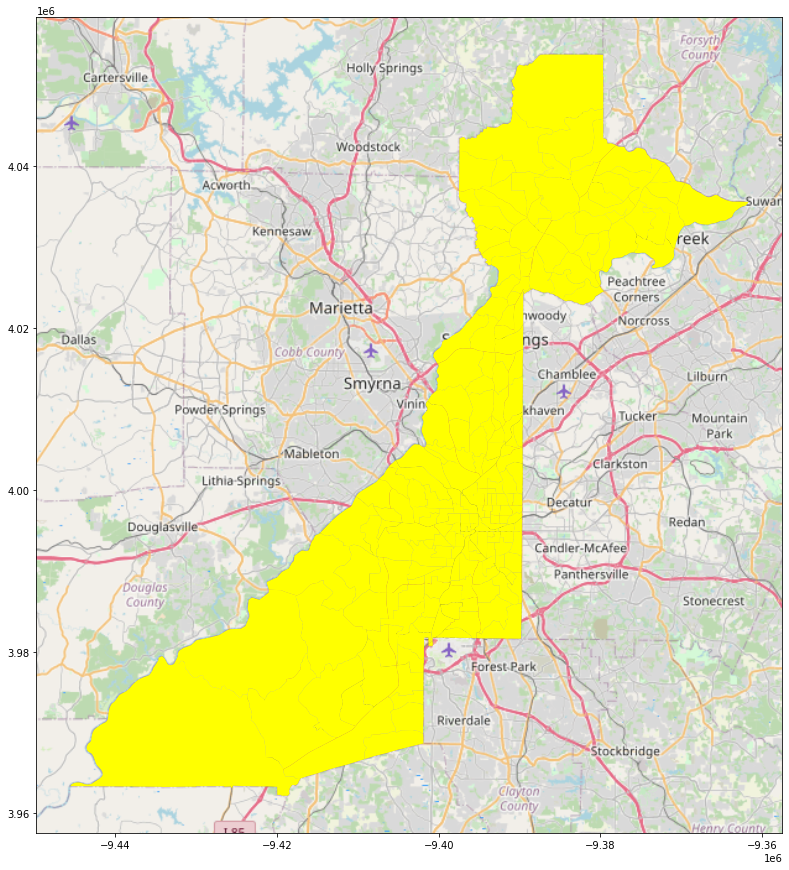

In [16]:
# Visualizing the food desert (my area of analysis)

ax = db.plot(figsize=(15, 15), alpha=0.2, color="k")
db.plot(ax=ax, color="yellow")
contextily.add_basemap(ax, url=contextily.sources.OSM_A);


In [17]:
db.describe()

,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_bachelor,median_hh_income,SNAP_hh,area_sqm,pct_bachelor,pct_black,pct_white,pct_SNAP
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,36.241872,4953.039216,2229.887255,2186.039216,1851.243781,4953.039216,24.602941,66844.262376,1920.833333,6.783384,0.006608,0.476051,0.425161,0.397742
std,6.990583,2972.071006,2155.574353,2604.308540,1254.172915,2972.071006,30.511472,42419.178750,1098.389713,15.697041,0.014627,0.370914,0.328695,0.107856
min,12.400000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,9815.000000,0.000000,0.090578,0.000000,0.000000,0.000000,0.000000
25%,32.400000,2590.500000,246.000000,545.000000,821.250000,2590.500000,0.000000,31153.250000,1091.250000,1.467469,0.000000,0.114780,0.067616,0.335617
50%,35.500000,4463.000000,1775.000000,1364.000000,1695.000000,4463.000000,16.000000,57066.500000,1834.000000,3.336304,0.004044,0.351557,0.474976,0.386730
75%,40.300000,6091.500000,3832.500000,2488.000000,2502.500000,6091.500000,33.250000,93487.000000,2565.500000,6.853089,0.008075,0.905903,0.731651,0.447258
max,67.900000,17958.000000,12255.000000,16075.000000,6555.000000,17958.000000,196.000000,200179.000000,6228.000000,185.117124,0.191176,1.000000,0.975895,0.808824


In [18]:
db.to_csv('fulton.csv', index=False)

In [19]:
! rm -f atlanta_tracts.gpkg
db.to_file("atlanta.gpkg", driver="GPKG")

## Kmeans Clustering (Elbow Method and Silhouette Scores)

In [20]:
from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
import seaborn 
import pandas as pd
import geopandas 
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('fulton.csv')
df.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_bachelor,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqm,pct_bachelor,pct_black,pct_white,pct_SNAP
0,13121007703,"POLYGON ((-9408543.140000001 3988685.68, -9408...",38.1,4403.0,42.0,4314.0,1155.0,4403.0,23.0,42150.0,1518.0,"Census Tract 77.03, Fulton County, Georgia",13,121,7703,4.531670,0.005224,0.979787,0.009539,0.344765
1,13121007807,"POLYGON ((-9408051.66 3997979.05, -9408034.289...",27.5,3564.0,60.0,3238.0,445.0,3564.0,24.0,21912.0,996.0,"Census Tract 78.07, Fulton County, Georgia",13,121,7807,2.898744,0.006734,0.908530,0.016835,0.279461
2,13121010508,"POLYGON ((-9406046.24 3974350.08, -9405997.59 ...",36.5,3503.0,171.0,3273.0,1230.0,3503.0,16.0,46983.0,1186.0,"Census Tract 105.08, Fulton County, Georgia",13,121,10508,3.906751,0.004568,0.934342,0.048815,0.338567
3,13121008302,"POLYGON ((-9402394.85 3996615.48, -9402284.869...",49.3,1653.0,21.0,1622.0,385.0,1653.0,0.0,28949.0,671.0,"Census Tract 83.02, Fulton County, Georgia",13,121,8302,1.890469,0.000000,0.981246,0.012704,0.405929
4,13121006601,"POLYGON ((-9398620.67 3988652.63, -9398605.42 ...",35.4,2087.0,329.0,1715.0,615.0,2087.0,26.0,36250.0,764.0,"Census Tract 66.01, Fulton County, Georgia",13,121,6601,1.954144,0.012458,0.821754,0.157643,0.366076


In [22]:
# Selecting my cluster variables
df_Short = df[['pct_white', 'pct_black', 'pct_bachelor', 'pct_SNAP', 'median_age', 'median_hh_income']]

In [23]:
import sklearn.cluster as cluster

In [24]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [25]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,3.652755e+11
1,2,1.131231e+11
2,3,4.917238e+10
3,4,2.530135e+10
4,5,1.815273e+10
5,6,1.088064e+10
6,7,8.259748e+09
7,8,6.753416e+09
8,9,5.402528e+09
9,10,4.371663e+09


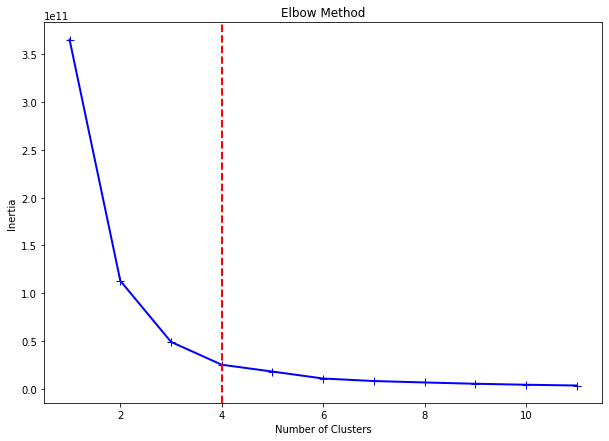

In [26]:
# Using elbow method to select the correct number of clusters

_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method', fontsize = 12)
_ = plt.xlabel('Number of Clusters',fontsize = 10)
_ = plt.ylabel('Inertia',fontsize = 10)

n_clusters = 4

_ = plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
_ = plt.show()

In [27]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from pylab import rcParams
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

In [28]:
# Double-checking the correct number of c;lusters is chosen using silhouette scores

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6318406031651715
Silhouette score for k(clusters) = 3 is 0.6169908455360215
Silhouette score for k(clusters) = 4 is 0.6137312790738851
Silhouette score for k(clusters) = 5 is 0.5917947190551015
Silhouette score for k(clusters) = 6 is 0.6004016618914658
Silhouette score for k(clusters) = 7 is 0.5751446924939094
Silhouette score for k(clusters) = 8 is 0.5598778662809184
Silhouette score for k(clusters) = 9 is 0.5333345136151703
Silhouette score for k(clusters) = 10 is 0.5509497316744304
Silhouette score for k(clusters) = 11 is 0.5427860184584598
Silhouette score for k(clusters) = 12 is 0.5521727124101651


In [29]:
silhouette_score(df_Short, kmeans.labels_)

0.5448717834223856

In [30]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_Short) for k in range(1,10)]

silhouette_scores = [silhouette_score(df_Short, model.labels_)
                    for model in kmeans_per_k[1:]]
silhouette_scores

[0.6318406031651713,
 0.6169908455360216,
 0.6137312790738855,
 0.5911811576639706,
 0.600401661891466,
 0.5751446924939103,
 0.55987786628092,
 0.5333345136151681]

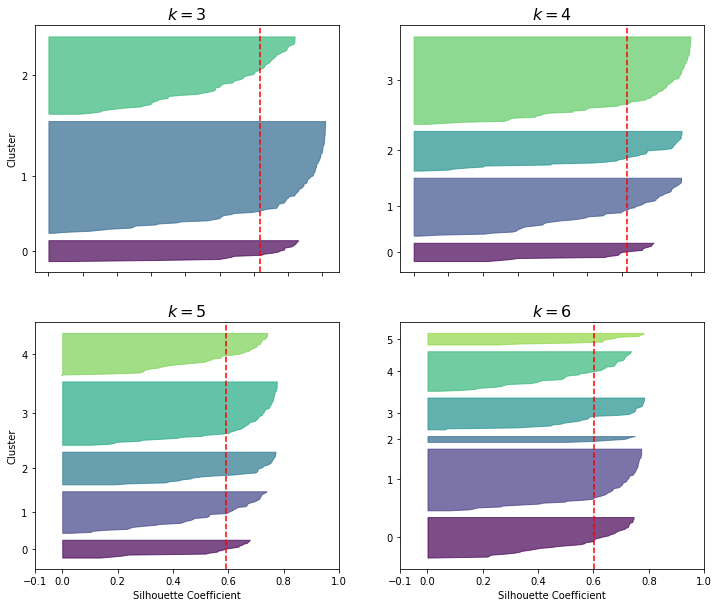

In [31]:
plt.figure(figsize=(12,10))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_Short, y_pred)
    
    padding = len(df_Short)//30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.viridis(i/k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
        
    if k in(5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
        
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)
    
plt.show()

## Clustering and Segmentation using PySAL 

In [32]:
db = geopandas.read_file('atlanta.gpkg')
db.columns


Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white',
       'total_pop_black', 'access_to_vehicle', 'hh_total', 'total_bachelor',
       'median_hh_income', 'SNAP_hh', 'NAME', 'state', 'county', 'tract',
       'area_sqm', 'pct_bachelor', 'pct_black', 'pct_white', 'pct_SNAP',
       'geometry'],
      dtype='object')

In [33]:
cluster_variables =  [
    'pct_white',          # Percent of tract population that is white
    'pct_black',          # Percent of tract population that is black
    'pct_bachelor',       # Percent of tract population with a Bachelors degree
    'pct_SNAP',
    'median_age',         # Median age of tract population
    'median_hh_income'    # Median household income
]

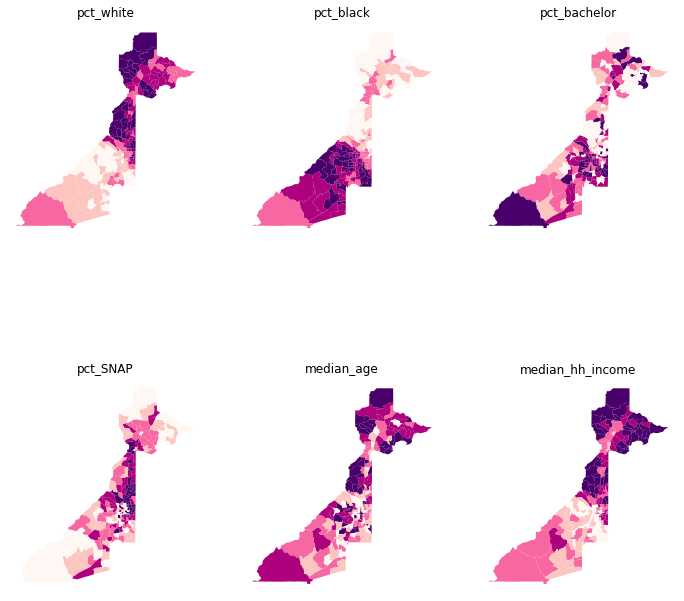

In [34]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='RdPu')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [35]:
w = Queen.from_dataframe(db)

In [36]:
w.islands

[]

In [37]:
# Set seed for reproducibility
numpy.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(db[variable], w) for variable in cluster_variables]
table = pd.DataFrame([(variable, res.I, res.p_sim) \
                          for variable,res \
                          in zip(cluster_variables, mi_results)
                         ], columns=['Variable', "Moran's I", 'P-value']
                        )\
              .set_index('Variable')
table

,Moran's I,P-value
Variable,,
pct_white,0.868826,0.001
pct_black,0.890161,0.001
pct_bachelor,0.039838,0.047
pct_SNAP,0.238407,0.001
median_age,0.166408,0.001
median_hh_income,0.650458,0.001


In [38]:
# Initialising KMeans instance
kmeans = KMeans(n_clusters=4)

In [39]:
numpy.random.seed(1234)
# Running K-Means algorithm
k4cls = kmeans.fit(db[cluster_variables])

In [40]:
k4cls.labels_

array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 1, 3, 1, 3, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 3, 3, 1, 3, 0, 0, 2, 3, 3, 3, 1, 1, 2, 1, 1, 2, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0, 3, 0, 0, 3, 3, 2,
       3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 3, 1, 3, 0, 1, 3, 1, 2, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 3, 3, 3, 3, 0, 3, 1, 2, 1, 1, 3, 0, 0, 0, 0, 3, 3, 0, 3,
       0, 0, 0, 3, 1, 3, 0, 1, 1, 3, 1, 3, 1, 1, 3, 2, 3, 0, 3, 2, 2, 0,
       0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 1, 3, 3, 2, 1, 1,
       0, 2, 2, 3, 1, 1], dtype=int32)

In [41]:
k4cls.cluster_centers_

array([[1.27652093e-01, 8.21884220e-01, 1.03782879e-02, 3.82102881e-01,
        3.38344828e+01, 3.05794138e+04],
       [7.65315908e-01, 1.01403055e-01, 3.47141468e-03, 4.24719416e-01,
        3.96150000e+01, 1.02675975e+05],
       [8.30623596e-01, 4.82216535e-02, 3.26863432e-03, 3.53007743e-01,
        4.45315789e+01, 1.62552000e+05],
       [5.04012006e-01, 3.55829462e-01, 4.20831544e-03, 4.17249592e-01,
        3.48110668e+01, 6.51774746e+04]])

In [42]:
k4cls.inertia_

25301349274.203163

In [43]:
k4cls.n_iter_

8

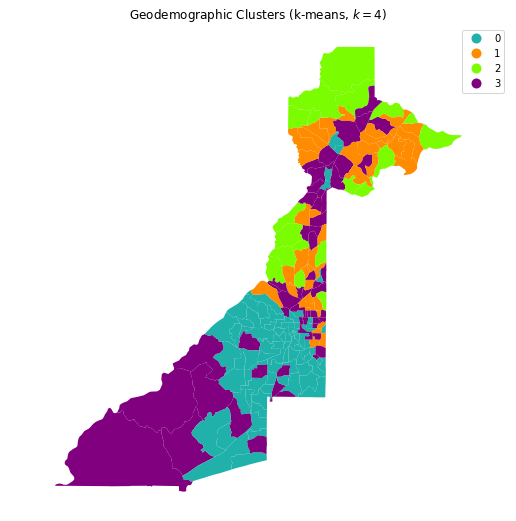

In [44]:
# Visualising clusters on the map

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmapTrial = ListedColormap(["lightseagreen", "darkorange", "lawngreen", "purple"])
db['k4cls'] = k4cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='k4cls', cmap=cmapTrial, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Geodemographic Clusters (k-means, $k=4$)')
plt.show()

In [45]:
# Grouping data table by cluster label and count observations
k4sizes = db.groupby('k4cls').size()
k4sizes


k4cls
0    87
1    40
2    19
3    58
dtype: int64

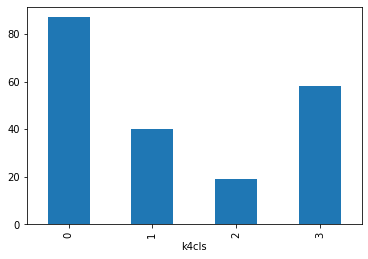

In [46]:
# cardinality
_ = k4sizes.plot.bar()

In [47]:
# Dissolve areas by Cluster, aggregate by summing, and keep column for area
areas = db.dissolve(by='k4cls', aggfunc='sum')['area_sqm']
areas

k4cls
0    355.149456
1    194.502643
2    243.458724
3    590.699535
Name: area_sqm, dtype: float64

<AxesSubplot:xlabel='k4cls'>

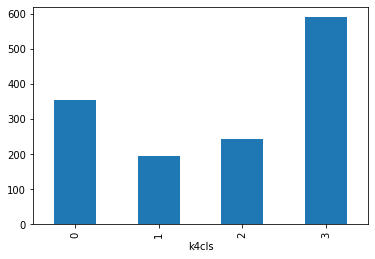

In [48]:
areas.plot.bar()

In [49]:
areas[3]/areas.sum()

0.4268645134906134

In [50]:
# Grouping table by cluster label
k4means = db.groupby('k4cls')[cluster_variables].mean()
k4means.T.round(3)

k4cls,0,1,2,3
pct_white,0.128,0.765,0.831,0.504
pct_black,0.822,0.101,0.048,0.356
pct_bachelor,0.010,0.003,0.003,0.004
pct_SNAP,0.382,0.425,0.353,0.417
median_age,33.834,39.615,44.532,34.811
median_hh_income,30579.414,102675.975,162552.000,65177.475


In [51]:
# Grouping table by cluster label, keep the variables used for clustering, and obtaining their descriptive summary
k4desc = db.groupby('k4cls')[cluster_variables].describe()
for cluster in k4desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k4desc.T[cluster].unstack())


	---------
	Cluster 0
                  count          mean          std          min           25%  \
pct_white          87.0      0.127652     0.157242     0.000000      0.021812   
pct_black          87.0      0.821884     0.199469     0.191483      0.777120   
pct_bachelor       87.0      0.010378     0.020931     0.000000      0.003814   
pct_SNAP           87.0      0.382103     0.102919     0.041799      0.331774   
median_age         87.0     33.834483     7.584881    12.400000     30.100000   
median_hh_income   87.0  30579.413793  9076.307694  9815.000000  24593.500000   

                           50%           75%           max  
pct_white             0.058947      0.160162      0.625127  
pct_black             0.908530      0.949826      1.000000  
pct_bachelor          0.006342      0.010154      0.191176  
pct_SNAP              0.372501      0.423992      0.808824  
median_age           33.300000     37.950000     67.900000  
median_hh_income  29276.000000  37519.00000

In [52]:
# Index db on cluster ID
tidy_db = db.set_index('k4cls')
tidy_db = tidy_db[cluster_variables]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_db

,k4cls,Attribute,Values
0,0,pct_white,0.009539
1,0,pct_black,0.979787
2,0,pct_bachelor,0.005224
3,0,pct_SNAP,0.344765
4,0,median_age,38.100000
...,...,...,...
1219,1,pct_black,0.101508
1220,1,pct_bachelor,0.013180
1221,1,pct_SNAP,0.316436
1222,1,median_age,38.000000


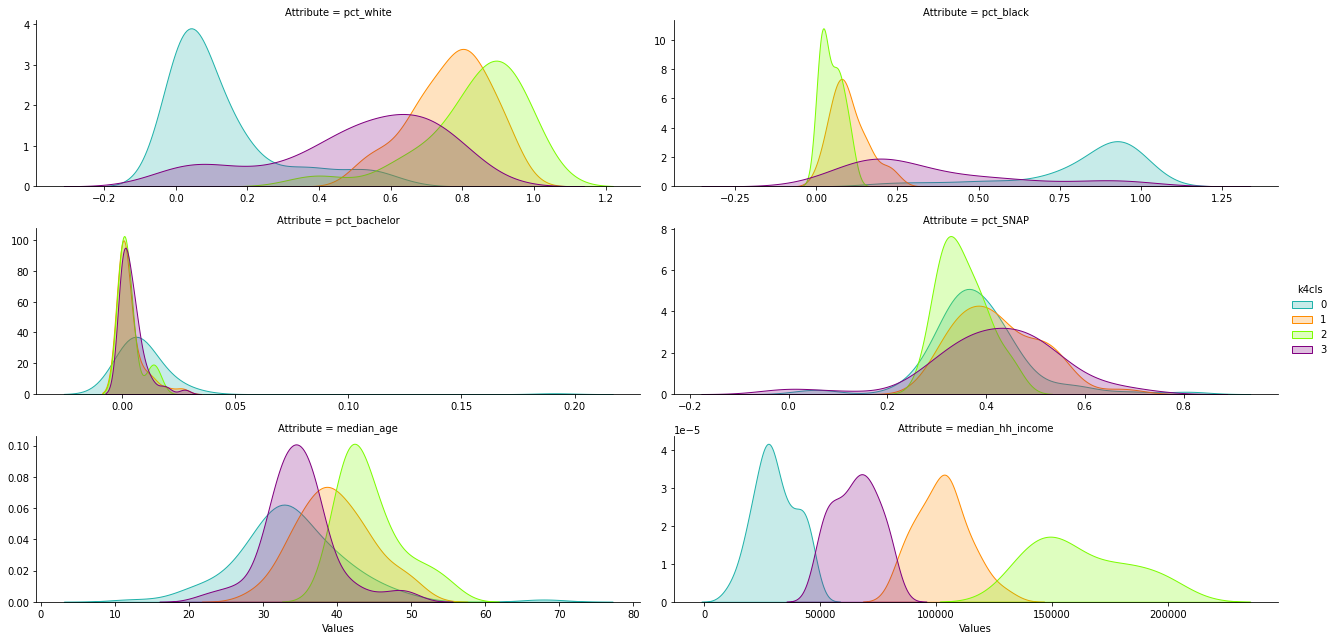

In [53]:
# Setup the facets

color = {0:"lightseagreen", 1:"darkorange", 2:"lawngreen", 3:"purple"}
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', palette=color, hue='k4cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)

_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()